# Supplementary Appendix - Dissertation

# 1. Import Libraries

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import ipywidgets as py
from ipywidgets import interact, interact_manual, interactive

# 2. Importing Data

In [107]:
df = pd.read_excel("Wealth Composition Data.xlsx", sheet_name= "Private Capital" )
net_non_fin = df[["Year", "National non-financial assets"]]
net_for = df[["Year", "Net foreign assets"]]
prv_capital = df[["Year", "Private Capital"]]
cap_distribution = pd.read_excel("Chapter3TablesFigures.xlsx", sheet_name = "Data",  usecols = "A:F")

In [108]:
df = pd.read_csv("Capital:income.csv" , encoding = "Latin-1")

In [109]:
df.head()

,Year,Capital Income Ratio (%),GDP growth rate (%),GDP (£)
0,01/01/1856,6.79,0.04,6.374800e+10
1,01/01/1857,6.69,0.06,6.763600e+10
2,01/01/1858,6.25,0.05,7.095600e+10
3,01/01/1859,6.12,0.09,7.768200e+10
4,01/01/1860,6.32,-0.04,7.489400e+10


In [110]:
nat_inc = pd.read_excel("Wealth Composition Data.xlsx", sheet_name= "National Income" )

# 3. Data Analysis

## 3.1 How do we quantify capital?

[Flow Chart](Private Capital.png)

In [111]:
net_for.head()

,Year,Net foreign assets
0,1855,898.523254
1,1856,963.395569
2,1857,1075.822876
3,1858,1267.671265
4,1859,1457.529297


In [112]:
net_non_fin.head()

,Year,National non-financial assets
0,1855,14683.117188
1,1856,14827.620117
2,1857,15345.301758
3,1858,14735.854492
4,1859,15555.375977


In [113]:
nat_inc.head()

,National income
0,4213.270996
1,4364.982910
2,4607.757813
3,4804.458496
4,5220.637207


In [114]:
df["Net foreign assets"] = net_for["Net foreign assets"]
df["Net non-financial assets"] = net_non_fin["National non-financial assets"]
df["Net Income"] = nat_inc
df["Private Capital"] = prv_capital["Private Capital"]
df_final = df[["Year", "Capital Income Ratio (%)", "Net foreign assets", "Net non-financial assets", "Net Income", "Private Capital", "GDP growth rate (%)"]]
df_final.head()

,Year,Capital Income Ratio (%),Net foreign assets,Net non-financial assets,Net Income,Private Capital,GDP growth rate (%)
0,01/01/1856,6.79,898.523254,14683.117188,4213.270996,15581.640442,0.04
1,01/01/1857,6.69,963.395569,14827.620117,4364.982910,15791.015686,0.06
2,01/01/1858,6.25,1075.822876,15345.301758,4607.757813,16421.124634,0.05
3,01/01/1859,6.12,1267.671265,14735.854492,4804.458496,16003.525757,0.09
4,01/01/1860,6.32,1457.529297,15555.375977,5220.637207,17012.905273,-0.04


In [115]:
df_final["NFA pct of Income"] =  df_final["Net Income"] / df_final["Net foreign assets"]
df_final["Nn-fA pct of Income"] = df_final["Net Income"] / df_final["Net non-financial assets"]
df_final.head()

,Year,Capital Income Ratio (%),Net foreign assets,Net non-financial assets,Net Income,Private Capital,GDP growth rate (%),NFA pct of Income,Nn-fA pct of Income
0,01/01/1856,6.79,898.523254,14683.117188,4213.270996,15581.640442,0.04,4.689106,0.286947
1,01/01/1857,6.69,963.395569,14827.620117,4364.982910,15791.015686,0.06,4.530831,0.294382
2,01/01/1858,6.25,1075.822876,15345.301758,4607.757813,16421.124634,0.05,4.283008,0.300272
3,01/01/1859,6.12,1267.671265,14735.854492,4804.458496,16003.525757,0.09,3.789988,0.326039
4,01/01/1860,6.32,1457.529297,15555.375977,5220.637207,17012.905273,-0.04,3.581840,0.335616


## 3.2 What is the correlation between growth rate and private capital?
### 3.2.1 Private Capital
[source](https://wid.world/data/) - extracted via query from the database

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


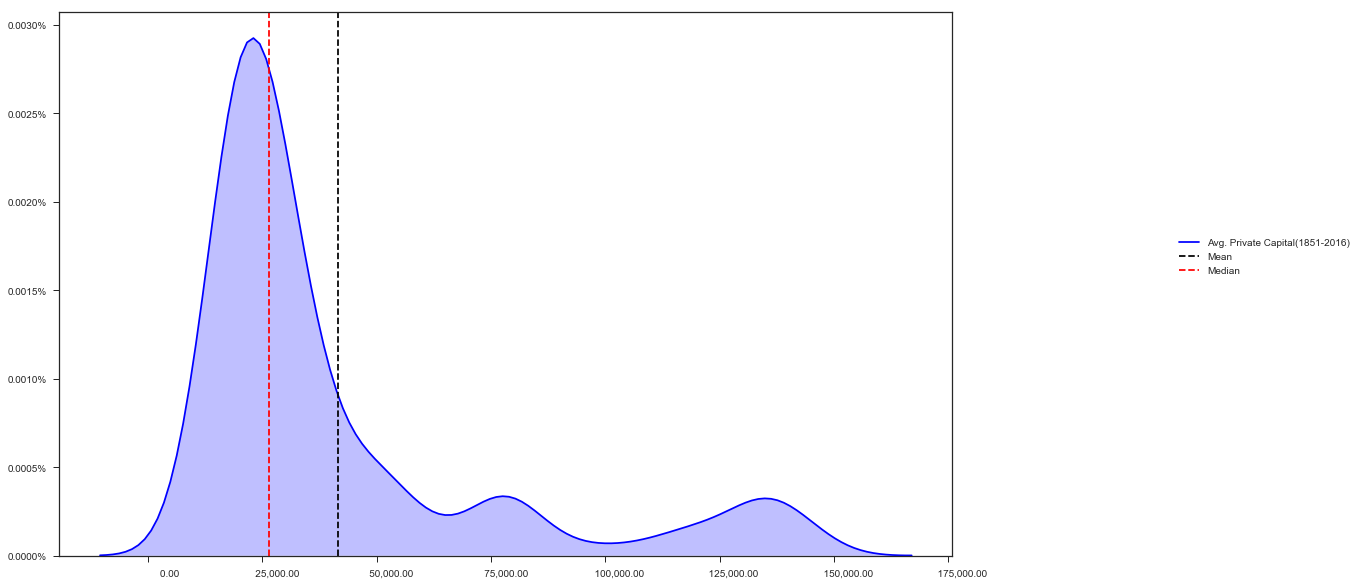

In [116]:
fig = plt.figure(figsize = (16, 10))
ax = sns.kdeplot(df["Private Capital"] , color="blue", label="Avg. Private Capital(1851-2016)", shade = True)
plt.axvline( x = df["Private Capital"].mean(), color = "black", linestyle ="--" , ymin=0, ymax=1, label = "Mean")
plt.axvline( x = df["Private Capital"].median(), color = "red", linestyle ="--" , ymin=0, ymax=1, label = "Median")


plt.legend(loc='lower center', bbox_to_anchor=(1.1, 0.5, 0.5, 0.5))


vals = ax.get_yticks()
ax.set_yticklabels(['{:,.4%}'.format(x) for x in vals])
valsy = ax.get_xticks()
ax.set_xticklabels(['{:20,.2f}'.format(x) for x in valsy])

plt.show()

In [117]:
lst = []

for row in df["Year"]:
    if row < "01/01/1906":
        row = "Block 1 (1851-1905)"
    elif row >= "01/01/1956":
        row = "Block 3 (1957-2016)"
    else: 
        row = "Block 2 (1906-1956)"
    lst.append(row)


fst_df = df[df["Year"] < "01/01/1906"]
snd_df = df[(df["Year"] >= "01/01/1907") & (df["Year"] < "01/01/1957")]
trd_df = df[df["Year"] >= "01/01/1956"]

df["Block"] = lst
df.head()

,Year,Capital Income Ratio (%),GDP growth rate (%),GDP (£),Net foreign assets,Net non-financial assets,Net Income,Private Capital,Block
0,01/01/1856,6.79,0.04,6.374800e+10,898.523254,14683.117188,4213.270996,15581.640442,Block 1 (1851-1905)
1,01/01/1857,6.69,0.06,6.763600e+10,963.395569,14827.620117,4364.982910,15791.015686,Block 1 (1851-1905)
2,01/01/1858,6.25,0.05,7.095600e+10,1075.822876,15345.301758,4607.757813,16421.124634,Block 1 (1851-1905)
3,01/01/1859,6.12,0.09,7.768200e+10,1267.671265,14735.854492,4804.458496,16003.525757,Block 1 (1851-1905)
4,01/01/1860,6.32,-0.04,7.489400e+10,1457.529297,15555.375977,5220.637207,17012.905273,Block 1 (1851-1905)


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


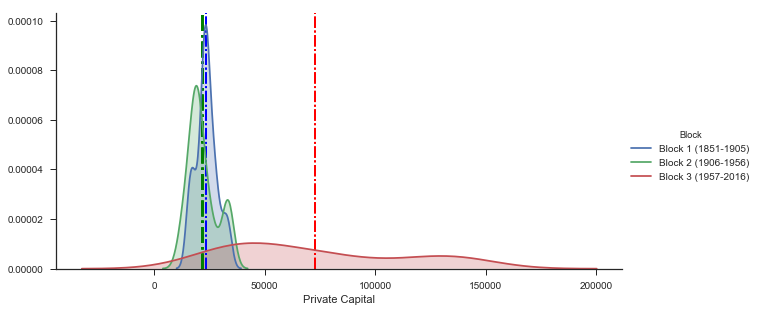

In [118]:
g = sns.FacetGrid(df,  hue = "Block", size=4.5, aspect=2)
g.map(plt.axvline, x = fst_df["Private Capital"].mean(), ls="-.", color = "blue")
g.map(plt.axvline, x = snd_df["Private Capital"].mean(), ls="-.", color = "green" , linewidth = 2.5)
g.map(plt.axvline, x = trd_df["Private Capital"].mean(), ls="-.", color = "red")

g.map(sns.kdeplot, "Private Capital" , shade = True)

g.add_legend()
plt.show();

In [92]:
def1 = df[df["Block"] == "Block 1 (1851-1905)"]
def2 = df[df["Block"] == "Block 2 (1906-1956)"]
def3 = df[df["Block"] == "Block 3 (1957-2016)"]


final_description = def1[["Private Capital"]].describe()
final_description.rename(columns =  {"Private Capital" : "Private Capital (1851-1905)"}, inplace = True)
final_description["Private Capital (1906-1956)"] = def2["Private Capital"].describe()
final_description["Private Capital (1957-2016)"] = def3["Private Capital"].describe()
final_description

,Private Capital (1851-1905),Private Capital (1906-1956),Private Capital (1957-2016)
count,50.000000,50.000000,60.000000
mean,23739.522234,21979.445414,72865.953235
std,4741.357678,6491.317173,39519.542067
min,15581.640442,11687.355957,22756.514069
25%,21812.659332,17812.758057,40706.905426
50%,23578.315186,20012.676331,58662.270294
75%,26785.925781,24905.757080,109657.254456
max,34026.283691,34737.508789,144834.825684


### 3.2.1 Growth Rate

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


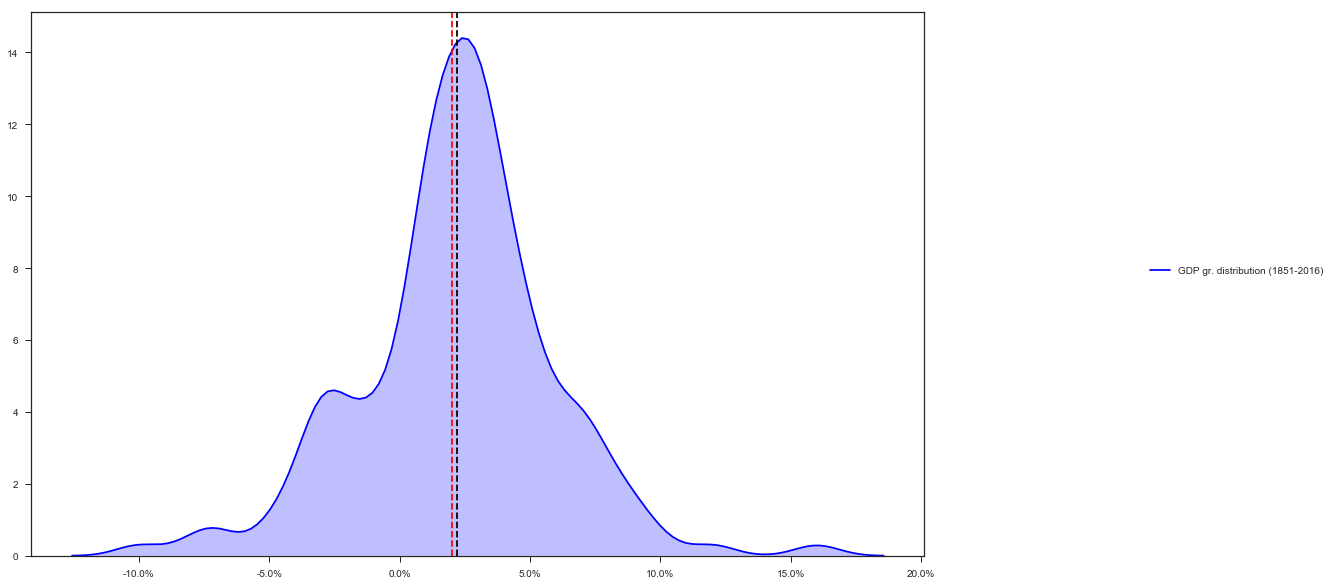

In [93]:
fig = plt.figure(figsize = (16, 10))
ax = sns.kdeplot(df["GDP growth rate (%)"] , color="blue", label="GDP gr. distribution (1851-2016)", shade = True)
plt.axvline( x = df["GDP growth rate (%)"].mean(), color = "black", linestyle ="--" , ymin=0, ymax=1)
plt.axvline( x = df["GDP growth rate (%)"].median(), color = "red", linestyle ="--" , ymin=0, ymax=1)


valsy = ax.get_xticks()
ax.set_xticklabels(['{:,.1%}'.format(x) for x in valsy])

plt.legend(loc='lower center', bbox_to_anchor=(1.1, 0.5, 0.5, 0.5))
plt.show()

In [94]:
df["GDP growth rate (%)"].mean() * 100

2.1874999999999987

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


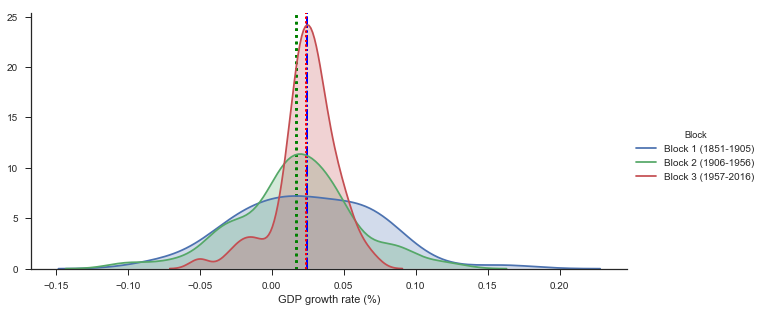

In [95]:
g = sns.FacetGrid(df,  hue = "Block", size=4.5, aspect=2)
g.map(plt.axvline, x = fst_df["GDP growth rate (%)"].mean(), ls="-.", color = "blue")
g.map(plt.axvline, x = snd_df["GDP growth rate (%)"].mean(), ls=":", color = "green" , linewidth = 2.5)
g.map(plt.axvline, x = trd_df["GDP growth rate (%)"].mean(), ls=":", color = "red")

g.map(sns.kdeplot, "GDP growth rate (%)" , shade = True)


g.add_legend()
plt.show();

In [96]:
fst_df.rename(columns = {"GDP growth rate (%)": "Block 1: GDP gr. (1851-1905)"} , inplace = True)
snd_df.rename(columns = {"GDP growth rate (%)": "Block 2: GDP gr. (1906-1956)"}, inplace = True)
trd_df.rename(columns = {"GDP growth rate (%)": "Block 3: GDP gr. (1957-2016)"}, inplace = True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [97]:
desc_1 = pd.DataFrame(fst_df["Block 1: GDP gr. (1851-1905)"].describe())

In [98]:
desc_2 = pd.DataFrame(snd_df["Block 2: GDP gr. (1906-1956)"].describe())

In [99]:
desc_3 = pd.DataFrame(trd_df["Block 3: GDP gr. (1957-2016)"].describe())

In [100]:
desc_comp = desc_1.copy()
desc_comp["Block 2: GDP gr. (1906-1956)"] = desc_2["Block 2: GDP gr. (1906-1956)"]
desc_comp["Block 3: GDP gr. (1957-2016)"] = desc_3["Block 3: GDP gr. (1957-2016)"]
desc_comp

,Block 1: GDP gr. (1851-1905),Block 2: GDP gr. (1906-1956),Block 3: GDP gr. (1957-2016)
count,50.000000,50.000000,60.000000
mean,0.024200,0.017000,0.024167
std,0.046865,0.041219,0.021494
min,-0.080000,-0.100000,-0.050000
25%,-0.010000,0.000000,0.020000
50%,0.025000,0.020000,0.030000
75%,0.060000,0.040000,0.040000
max,0.160000,0.120000,0.070000


### 3.2.3 Correlation - Growth Rate & Private Capital

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


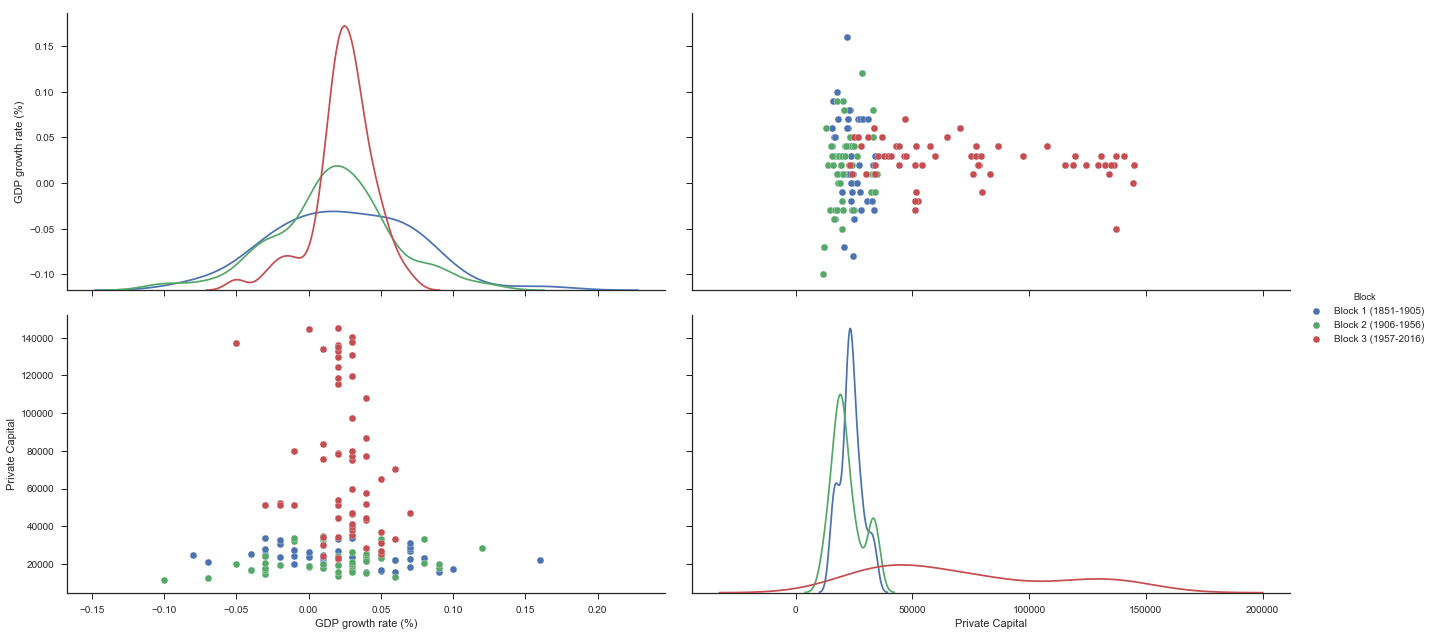

In [101]:
sns.set(style="ticks", color_codes=True)
ax = sns.pairplot(df[["GDP growth rate (%)", "Private Capital", "Block"]],size=4.5, aspect=2, hue = "Block", kind = "scatter", diag_kind= "kde")

plt.show()

## 3.3 What is the correlation between income and private capital?!

### 3.3.1 National Income

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


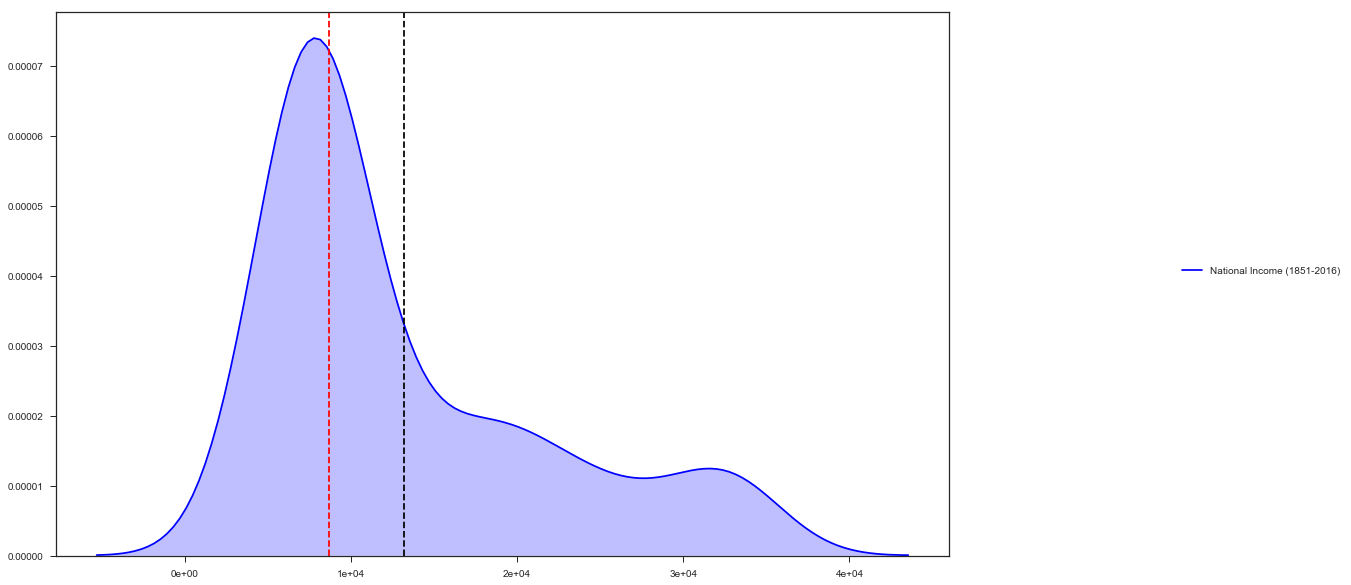

In [102]:
fig = plt.figure(figsize = (16, 10))
ax = sns.kdeplot(df["Net Income"] , color="blue", label="National Income (1851-2016)", shade = True)
plt.axvline( x = df["Net Income"].mean(), color = "black", linestyle ="--" , ymin=0, ymax=1)
plt.axvline( x = df["Net Income"].median(), color = "red", linestyle ="--" , ymin=0, ymax=1)


valsy = ax.get_xticks()
ax.set_xticklabels(['{:,.1}'.format(x) for x in valsy])

plt.legend(loc='lower center', bbox_to_anchor=(1.1, 0.5, 0.5, 0.5))
plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


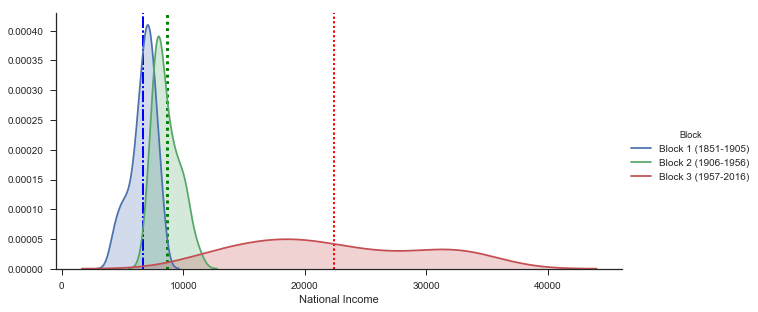

In [103]:
dfi = df.copy()
dfi.rename(columns = {"Net Income" : "National Income"}, inplace = True)

g = sns.FacetGrid(dfi,  hue = "Block", size=4.5, aspect=2)
g.map(plt.axvline, x = fst_df["Net Income"].mean(), ls="-.", color = "blue")
g.map(plt.axvline, x = snd_df["Net Income"].mean(), ls=":", color = "green" , linewidth = 2.5)
g.map(plt.axvline, x = trd_df["Net Income"].mean(), ls=":", color = "red")

g.map(sns.kdeplot, "National Income" , shade = True)


g.add_legend()
plt.show();

In [105]:
one = df[df["Block"] == "Block 1 (1851-1905)"]
desc_one = pd.DataFrame(one["Net Income"].describe())
two = df[df["Block"] == "Block 2 (1906-1956)"]
desc_one["Block 2: National Income (1906-1956)"] = two["Net Income"].describe()
three = df[df["Block"] == "Block 3 (1957-2016)"]
desc_one["Block 3: National Income (1957-2016)"] = three["Net Income"].describe()
desc_one.rename(columns = {"Net Income": "Block 1: National Income (1851-1905)"})

,Block 1: National Income (1851-1905),Block 2: National Income (1906-1956),Block 3: National Income (1957-2016)
count,50.000000,50.000000,60.000000
mean,6695.354932,8608.934746,22430.661264
std,1028.419406,1048.489173,7131.904940
min,4213.270996,7001.854004,11642.178710
25%,6221.255737,7859.634033,16959.988280
50%,6894.388428,8218.435791,20618.737305
75%,7416.722779,9244.642090,29250.122560
max,8345.655273,11258.235350,34025.296880


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


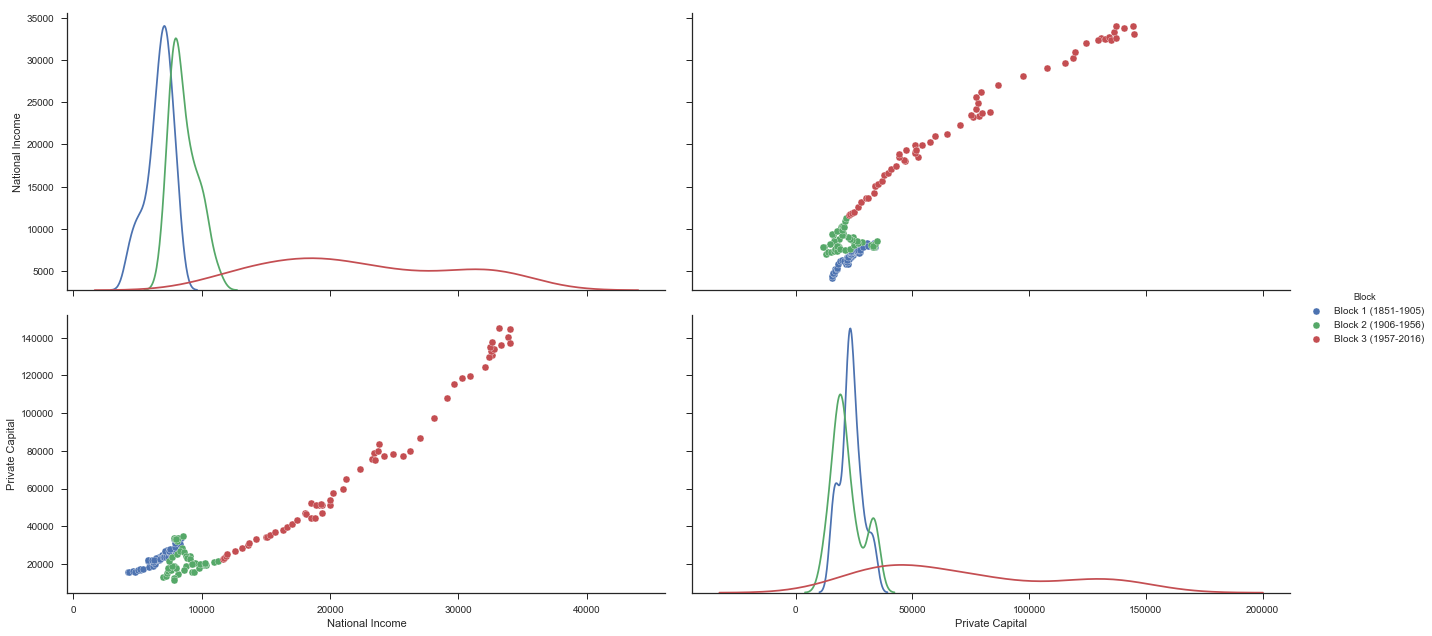

In [75]:
sns.set(style="ticks")

ax = sns.pairplot(dfi[["National Income", "Private Capital", "Block"]], size=4.5, aspect=2, hue = "Block", diag_kind= "kde")
plt.show()

### 3.3.2 Capital Income

In [168]:
df[["Year","Capital Income Ratio (%)"]].head()

,Year,Capital Income Ratio (%)
0,01/01/1856,6.79
1,01/01/1857,6.69
2,01/01/1858,6.25
3,01/01/1859,6.12
4,01/01/1860,6.32


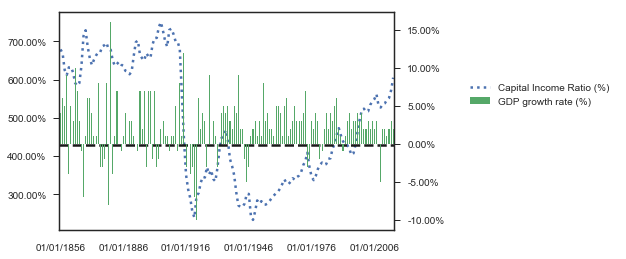

In [169]:
ax = df.plot(kind = "line",y="Capital Income Ratio (%)", legend=False , color = "b" , linewidth = 2.5, ls = ":")
ax2 = ax.twinx()
df.plot(kind = "bar", y="GDP growth rate (%)", ax=ax2, x = "Year", legend=False, color="g")
ax.axhline(4.3, color = "k" , linewidth = 2.5, linestyle = "--")

spacing = 30
visible = ax.xaxis.get_ticklabels()[::spacing]
for label in ax.xaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)

        
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
vals2 = ax2.get_yticks()
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals2])

ax.figure.legend(loc='lower center', bbox_to_anchor=(1, 0.5, 0.5, 0.5))

ax.xaxis.set_ticks_position('none') 

plt.show()

### 3.3.2 Stratification of Capital Income Ratio


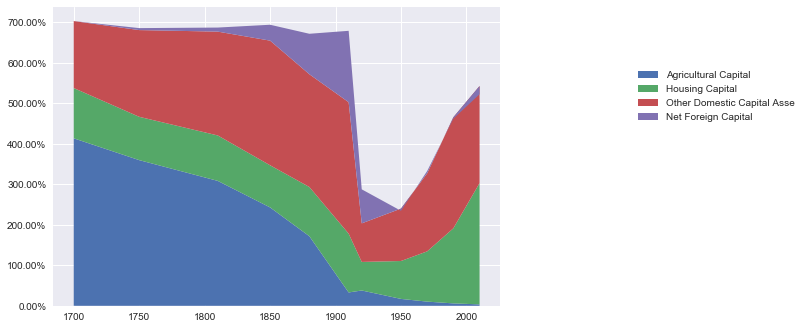

In [170]:
plt.style.use('seaborn')


x = cap_distribution["Year"]
y1 = cap_distribution["Agricultural Capital"]
y2 = cap_distribution["Housing Capital"]
y3 = cap_distribution["Other Domestic Capital Assets"]
y4 = cap_distribution["Net Foreign Capital"]

y = np.vstack([y1, y2, y3,y4])

labels = ["Agricultural Capital ", "Housing Capital", "Other Domestic Capital Assets", "Net Foreign Capital"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3,y4, labels=labels)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

ax.figure.legend(loc='lower center', bbox_to_anchor=(1, 0.5, 0.5, 0.5))
plt.show()

## 3.4 Can we predict future levels of private capital?

In [47]:
df_final.head()

,Year,Capital Income Ratio (%),Net foreign assets,Net non-financial assets,Net Income,Private Capital,GDP growth rate (%),NFA pct of Income,Nn-fA pct of Income
0,01/01/1856,6.79,898.523254,14683.117188,4213.270996,15581.640442,0.04,4.689106,0.286947
1,01/01/1857,6.69,963.395569,14827.620117,4364.982910,15791.015686,0.06,4.530831,0.294382
2,01/01/1858,6.25,1075.822876,15345.301758,4607.757813,16421.124634,0.05,4.283008,0.300272
3,01/01/1859,6.12,1267.671265,14735.854492,4804.458496,16003.525757,0.09,3.789988,0.326039
4,01/01/1860,6.32,1457.529297,15555.375977,5220.637207,17012.905273,-0.04,3.581840,0.335616


### 3.4.2 Regression Output - Multivariate Linear Regression

$Y_i = \beta1_{x1_i} + \beta2_{x2_i} + \beta3_{x3_i^2} + \beta4_{x4_i^2} + \beta5_{x5_i^2} + u_i$

#### 3.4.2.1 Regression Output - Multivariate Linear Regression and Dummies

In [134]:
df["is_Block_1"] = df["Block"] == "Block 1 (1851-1905)"
df["is_Block_2"] = df["Block"] == "Block 2 (1906-1956)"
df["is_Block_1"] = df["is_Block_1"].astype(int)
df["is_Block_2"] = df["is_Block_2"].astype(int)

In [135]:
import statsmodels.api as sm
X = df[["Net foreign assets","Net non-financial assets", "GDP growth rate (%)","is_Block_1", "is_Block_2"]] #Loading independent variables
y = df["Capital Income Ratio (%)"] ## Y usually means our output/dependent variable


# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Capital Income Ratio (%)   R-squared:                       0.971
Model:                                  OLS   Adj. R-squared:                  0.970
Method:                       Least Squares   F-statistic:                     1032.
Date:                      Sun, 28 Apr 2019   Prob (F-statistic):          5.19e-117
Time:                              04:52:06   Log-Likelihood:                -205.30
No. Observations:                       160   AIC:                             420.6
Df Residuals:                           155   BIC:                             436.0
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

#### 3.4.2.2 Goodness of fit - Mean Squared Error

In [137]:
from sklearn.metrics import mean_squared_error
y_true = df["Capital Income Ratio (%)"]
y_pred = predictions

rmse = mean_squared_error(y_true, y_pred)
print(rmse)

0.7621483567128079


#### 3.4.2.3 Regression Plot

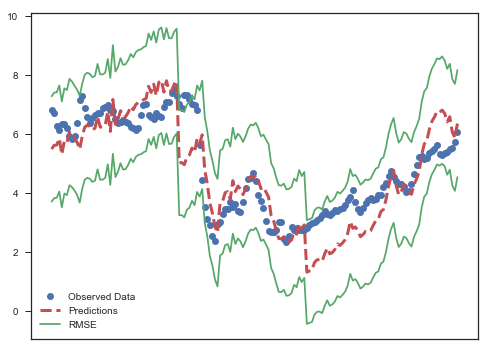

In [141]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy.interpolate import spline

prstd, iv_l, iv_u = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(y, 'o', label="Observed Data")
ax.plot(predictions, 'r--', label="Predictions", linewidth = 3.0)

ax.plot(iv_l, 'g-',)
ax.plot(iv_u, 'g-',label = "RMSE")



frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
ax.legend(loc='best');

#### 3.4.2.4 Testing for heteroskedasticity - White Test

In [138]:
from statsmodels.stats.diagnostic import het_breuschpagan

dictionary = {"Lagrange Multiplier Statistic" : het_breuschpagan(y, X)[0],
             "p-value of Lagrange Multiplier test" : het_breuschpagan(y, X)[1],
             "F-statistic" : het_breuschpagan(y, X)[2],
             "f_pvalue" : het_breuschpagan(y, X)[3]}
het = pd.DataFrame.from_dict(dictionary, orient = "index")
het.rename(columns = {0 : "Heteroscedasticity - Test Results"})

,Heteroscedasticity - Test Results
Lagrange Multiplier Statistic,1.516251e+02
p-value of Lagrange Multiplier test,9.129937e-32
F-statistic,5.612433e+02
f_pvalue,2.499981e-97


#### 3.4.2.5 Testing for 2nd order serial correlation

In [139]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

acorr_breusch_godfrey(model,2)

dictionary = {"Lagrange Multiplier Statistic" : acorr_breusch_godfrey(model,2)[0],
             "p-value of Lagrange Multiplier test" : acorr_breusch_godfrey(model,2)[1],
             "F-statistic" : acorr_breusch_godfrey(model,2)[2],
             "f_pvalue" : acorr_breusch_godfrey(model,2)[3]}
lm = pd.DataFrame.from_dict(dictionary, orient = "index")
lm.rename(columns = {0 : "LM - Test Results"})

,LM - Test Results
Lagrange Multiplier Statistic,1.346772e+02
p-value of Lagrange Multiplier test,5.691448e-30
F-statistic,2.101294e+02
f_pvalue,1.750190e-44


#### 3.4.2.6 Testing Normality of the residuals

In [142]:
from scipy import stats

stats.jarque_bera(model.resid)
dictionary = {"Test Statistic" : stats.jarque_bera(model.resid)[0],
             "p-value" : stats.jarque_bera(model.resid)[1]}
jb = pd.DataFrame.from_dict(dictionary, orient = "index")
jb.rename(columns = {0 : "Test-Results"})

,Test-Results
Test Statistic,4.339675
p-value,0.114196
